In [1]:
# -*- coding: utf-8 -*-
from types import SimpleNamespace as Namespace
import pandas as pd
import glob
import numpy as np
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib
import matplotlib.style
matplotlib.style.use('ggplot')
import seaborn
import operator
import math
import seaborn as sns
import re
import json

In [2]:
# создаем метки класса
def AddLabel(data, count, n, df):
    # присваем метку
    cnt = count
    tmp = 0
    for i in range(0, len(data)):
        tmp = tmp + 1
        try:
            val = cnt + tmp
            df.loc[-1] = [data[i]['theme'], val]
            df.index = df.index + 1
            data[i].update({"label": val})
            AddLabel(data[i]['questions'], (val) * n, n * 10, df)
        except:
            val = cnt + tmp
            data[i].update({"label": val})
    return

In [232]:
# вытаскиваем метки для каждого объекта
# С ВОПРОСОМ И ОТВЕТОМ
def Unroll(data, labels, temp, n, m):
    for i in range(0, len(data)):
        try:
            while len(str(data[i]['label'])) <= len(str(temp[-1])):
                temp = temp[:-1]
            temp.append(data[i]['label'])
        except:
            temp.append(data[i]['label'])
        try:
            Unroll1(data[i]['questions'], labels, temp, n, m)
            temp = temp[:-2]
        except:
            temp.append(data[i]['question'])
            temp.append(data[i]['response'])
            labels.append(temp)
            temp = temp[:-2]

In [213]:
labels1 = 1000 * []
Unroll1(data1, labels1, [] * 6, 0, 0)

In [239]:
#формирование dataframe
def Create_Df(data, max_depth, df_chavo):
    cnt = 0
    for line in data:
        tmp_cnt = 0
        tmp = [] * 5
        for obj in line:
            #print(obj)
            if isinstance(obj, int) and tmp_cnt <= max_depth:
                tmp.append(obj)
                tmp_cnt = tmp_cnt + 1
            elif isinstance(obj, int) is False and tmp_cnt <= max_depth:
                while tmp_cnt <= max_depth - 1:
                    tmp.append('None')
                    tmp_cnt = tmp_cnt + 1
                tmp.append(obj)
        df_chavo.loc[-1] = tmp
        df_chavo.index = df_chavo.index + 1
        cnt = cnt + 1
    return

In [228]:
df_chavo1 = pd.DataFrame(columns=['theme0', 'theme1', 'theme2', 'theme3', 'theme4', 'question', 'response'])
Create_Df(labels1, max_depth + 1, df_chavo1)

[101, 1011, 101101, 101101001, 'None', 'ТАРИФ В SIEBEL НЕ ПОДКЛЮЧЕН - ПРОВЕРИТЬ ДАТУ УСТАНОВКИ МП В SIEBEL, ЕСЛИ ПРОШЛО МЕНЕЕ ДВУХ ДНЕЙ', 'По техническим причинам, предложение тарифов станет доступно на Вашей бонусной карте НАЗВАТЬ ДАТУ ЧЕРЕЗ ДВА ДНЯ ПОСЛЕ УСТАНОВКИ МП. Приносим извинения за доставленные неудобства. СТАТИСТИКА']
[101, 1011, 101101, 101101002, 'None', 'ПРОШЛО ДВА ДНЯ С ДАТЫ УСТАНОВКИ МП В SIEBEL, ТАРИФЫ НЕ ОТОБРАЗИЛИСЬ', 'Просим Вас попробовать сделать Pull To Refresh (потянуть экран вниз, нахо']
[101, 1011, 101102, 'None', 'None', 'КАК ВОЙТИ (АВТОРИЗОВАТЬСЯ) В МП?', 'iOS Для входа в мобильное приложение используйте пароль к Личному кабинету на сайте www.gpnbonus.ru. Если Вы еще не регистрировались в Личном кабинете, запросите временный пароль при первом входе. Android Для входа в мобильное приложение используйте номер телефона, привязанный к карте «Нам по пути». Код для входа придет на указанный Вами номер телефона. ']
[101, 1011, 101103, 'None', 'None', 'КАКИЕ ФУНКЦИИ

[101, 1014, 101410, 'None', 'None', 'ТРАНСПОНДЕР', 'На этой странице Вы можете пополнить баланс на счету транспондера Автодор без регистрации. Для этого в системе Вам нужно выбрать способ оплаты (по номеру мобильного телефона, по номеру договора, по номеру транспондера), внести соответствующие данные для оплаты. Услуга предоставляется компанией Автодор-Платные дороги. По любым вопросам о данной услуге Вы можете обратиться по телефону горячей линии 8-800-707-23-23.']
[101, 1014, 101411, 'None', 'None', 'КОНСУЛЬТАЦИИ', 'На этой странице Вы можете заказать бесплатную консультацию профессионального автомеханика в случае если Ваш автомобиль заглох или не заводится или Вы заметили признаки поломок при движении Вашего автомобиля. Для этого в системе Вам нужно просто заказать звонок, и специалист проконсультирует Вас по интересующим Вас вопросам. Услуга предоставляется Русским Авто Мото Клубом. По любым вопросам о данной услуге Вы можете обратиться по телефону горячей линии 8-800-250-72-62.']


[105, 1051, 105102, 'None', 'None', 'КАК ЗАПРАВЛЯТЬСЯ С ПОМОЩЬЮ МОБИЛЬНОГО ПРИЛОЖЕНИЯ АЗС GO?', 'Мобильное приложение работает по системе «предоплата». Чтобы заправиться с помощью мобильного приложения АЗС GО: 1.\tОстановитесь у свободной топливно-раздаточной колонки 2.\tВ приложении выберите АЗС, на которой находитесь. 3.\tУкажите номер колонки, наименование топлива и объем 4.\tУкажите эл. почту для получения чека об оплате 5.\tОплатите заказ 6.\tДождитесь завершения обработки заказа 7.\tНе снимайте пистолет до указания помощника в приложении 8.\tПосле одобрения помощником вставьте пистолет в бак автомобиля 9.\tДождитесь окончания заправки и верните пистолет в бак']
[105, 1051, 105103, 'None', 'None', 'КАК ВОЙТИ (АВТОРИЗОВАТЬСЯ) В МОБИЛЬНОМ ПРИЛОЖЕНИИ?', 'Для входа в мобильное приложение введите номер своего мобильного телефона. На него Вам будет выслан одноразовый пароль, который необходимо указать при авторизации.']
[105, 1051, 105104, 'None', 'None', 'КАК ИЗМЕНИТЬ ТЕЛЕФОН?', 'Измен

[105, 1052, 105222, 'None', 'None', 'КАК УЗНАТЬ СКОЛЬКО ФАКТИЧЕСКИ СПИСАНО С КАРТЫ?', 'Из-за особенностей обработки операций по банковским картам при «разморозке» денежных средств клиент не получает уведомление об операции на свой телефон.  Сумму фактически списанных средств можно увидеть в реестре по операциям по карте через 1-3 дня после заправки. Реестр операций можно получить в банке, выпустившем карту, либо в соответствующем разделе мобильного приложения банка.  Сумма в реестре операций будет в точности совпадать с суммой в кассовом чеке, который клиент получит на свою электронную почту после заправки. В случае отсутствия или некорректного отображения операций по карте, клиенту для уточнения необходимо обратиться в банк, выпустивший карту.']
[105, 1052, 105223, 'None', 'None', 'ХОТЕЛ ПРИВЯЗАТЬ КАРТУ, А КАРТА НЕ ПОЯВИЛАСЬ/ТЕСТОВЫЙ РУБЛЬ ВЕРНУЛСЯ', 'Чаще всего такое происходит при ошибочном введении информации по банковской карте. Проверьте, пожалуйста, корректность данных: срок дей

[106, 1082, 'None', 'None', 'None', 'ОБЯЗАТЕЛЬНО ЛИ БЫТЬ УЧАСТНИКОМ ПРОГРАММЫ ЛОЯЛЬНОСТИ «НАМ ПО ПУТИ» /ЗАПРАВЛЯТЬСЯ С ПРИМЕНЕНИЕМ КАРТЫ? ', 'Да. Для получения призового начисления двойных бонусов за покупки топлива необходимо иметь карту программы лояльности «Нам по пути».']
[106, 1083, 'None', 'None', 'None', 'РАСПРОСТРАНЯЕТСЯ ЛИ ПРЕДЛОЖЕНИЕ НА СТиУ, ДОП. УСЛУГИ И СЕРВИСЫ?', 'Нет. Двойные бонусы будут начисляться только на автомобильное топливо.']
[106, 1084, 'None', 'None', 'None', 'Я МОГУ УЧАСТВОВАТЬ В ДРУГИХ АКЦИЯХ ОДНОВРЕМЕННО С ЭТОЙ? ', 'Начисление бонусов по настоящей Акции суммируется с начислениями бонусов по другим акциям, проходящим в сети АЗС «Газпромнефть» в период реализации Победителями своего права на получение двойных бонусов.']
[106, 1085, 'None', 'None', 'None', 'СРОК ДЕЙСТВИЯ АКЦИОННЫХ БОНУСОВ', '12 месяцев с момента начисления.']
[107, 1071, 'None', 'None', 'None', 'АДРЕСА МАГАЗИНОВ', 'Полный список магазинов Вы можете найти на сайте https://stopexpress.ru/']
[107

In [229]:
df_chavo1

,theme0,theme1,theme2,theme3,theme4,question,response
243,101,1011,101101,101101001,None,ТАРИФ В SIEBEL НЕ ПОДКЛЮЧЕН - ПРОВЕРИТЬ ДАТУ У...,"По техническим причинам, предложение тарифов с..."
242,101,1011,101101,101101002,None,"ПРОШЛО ДВА ДНЯ С ДАТЫ УСТАНОВКИ МП В SIEBEL, Т...",Просим Вас попробовать сделать Pull To Refresh...
241,101,1011,101102,None,None,КАК ВОЙТИ (АВТОРИЗОВАТЬСЯ) В МП?,iOS Для входа в мобильное приложение используй...
240,101,1011,101103,None,None,КАКИЕ ФУНКЦИИ ЕСТЬ В МП?,Бесплатное приложение «Сеть АЗС «Газпромнефть»...
239,101,1011,101104,None,None,ГДЕ Я МОГУ УВИДЕТЬ АКЦИИ И ПРЕДЛОЖЕНИЯ В МП?,"Список актуальных акций Вы можете посмотреть, ..."
...,...,...,...,...,...,...,...
4,110,1102,None,None,None,ПОЧЕМУ ВЫ ЗАКРЫЛИ СТАРЫЕ АЗС? МНЕ БЫЛО УДОБНЕЕ...,"Мы проанализировали отзывы наших клиентов, а т..."
3,111,1111,None,None,None,У КЛИЕНТА ПРОИЗОШЕЛ ОБМЕН КАРТ НА АЗС,"Правильно я понимаю, что сейчас у Вас на руках..."
2,111,1112,None,None,None,"ЗАБЫЛ ВЕЩИ НА ЗАПРАВКЕ, ЧТО ДЕЛАТЬ?",На какой АЗС это произошло? Назовите адрес или...
1,112,1121,None,None,None,ГДЕ ВЫ НАХОДИТЕСЬ,Данная информация является конфиденциальной. В...


In [5]:
def LoadTrain(data_csv):
    files = glob.glob("/home/varykha/Documents/diplom/td/classif/data/data*.csv")
    for file in files:
        tmp = pd.read_csv(file, sep=';')
        data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    #tmp = pd.read_csv("/home/varykha/gpn_diplom/data1.csv", sep=';')
    data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    data = FilterRowsOperator(data_csv)
    #data = FilterRowsQuestions(data_csv)
    #print(data)
    return data
    # data1 = data1[['Идентификатор обращения', 'Автор', 'Сообщения']]

In [6]:
#with answers
def LoadTrainAnswers(data_csv):
    files = glob.glob("/home/varykha/Documents/diplom/td/classif/data/data*.csv")
    for file in files:
        tmp = pd.read_csv(file, sep=';')
        data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    #data = FilterRowsOperator(data_csv)
    #tmp = pd.read_csv("/home/varykha/gpn_diplom/data1.csv", sep=';')
    #data_ans = FilterRowsOperator(data_csv)
    data_csv = pd.concat([tmp, data_csv], ignore_index=True)
    data_quest = FilterRowsQuestions(data_csv)
    return data_quest

In [7]:
#выбираем ответы только оператора
def FilterRowsOperator(data_csv):
    data_csv = data_csv[['Идентификатор обращения', 'Автор', 'Сообщения']]
    data_csv.head()
    data_csv = data_csv[data_csv['Автор'].str.contains('Оператор*')==True]

    return data_csv

In [8]:
#выбираем ответы только пользователя 
def FilterRowsQuestions(data_csv):
    data_csv = data_csv[['Идентификатор обращения', 'Автор', 'Сообщения']]
    data_csv.head()
    data_csv = data_csv[data_csv['Автор'].str.contains('Оператор*')==False]
    return data_csv

In [248]:
def CousinDist(df_chavo, data_csv):
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(df_chavo['response'])
    print(X_train_counts.shape)
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    print(X_train_tfidf.shape)

    #res = [0] * len(data_csv)
    #k = 0;
    #p = 0
    res=[]
    res2 = [0] * len(data_csv)

    for index, i in data_csv.iterrows():
        res.append([np.amax(cosine_similarity(count_vect.transform([data_csv['Сообщения'][index]]), X_train_tfidf)),
                    data_csv['Идентификатор обращения'][index],
                    df_chavo.iloc[np.argmax(cosine_similarity(count_vect.transform([data_csv['Сообщения'][index]]), X_train_tfidf))]['response'],
                    df_chavo.iloc[np.argmax(cosine_similarity(count_vect.transform([data_csv['Сообщения'][index]]), X_train_tfidf))]['question'],
                    data_csv['Сообщения'][index]])
        '''if res[k] > 0:
            res2[p] = res[k]
            p = p + 1
        k = k + 1'''
    #print(np.amax(res))
    #print(np.amax(res2))

    d = pd.DataFrame(res, columns=['Косинусная мера','Идентификатор обращения','Сообщение ЧАВО', 'Вопрос ЧАВО', 'Сообщение'])
    return d
    #sns.kdeplot(s).figure.savefig('cos1.png')
    #s = pd.Series(res)
    #res_around = np.around(res, decimals=4)
    #dict_my = collections.Counter(res_around)
    #s = pd.Series(res)
    #s.plot.kde().figure.savefig('cos1.v1.png')
    #s.plot.hist(alpha=0.6).figure.savefig('histv.1.png')

    #s2 = pd.Series(res2)
    #res_around2 = np.around(res2, decimals=4)
    #dict_my2 = collections.Counter(res_around2d
    #s2 = pd.Series(res2)
    #s2.plot.kde().figure.savefig('cos1.v2.png')
    #s2.plot.hist(alpha=0.6).figure.savefig('histv.2.png')
    
    #d.plot.kde().figure.savefig('cos_v.png')
    #return d
                   


In [10]:
def ReturnLabel(df_chavo, theme_label, response):
    find = pd.DataFrame(df_chavo.loc[df_chavo['response'] == response])
    result = pd.DataFrame()
    result_list_theme = []
    result_list_label = []
    
    # print(find)
    merged_inner = pd.DataFrame(columns=['label', 'theme', 'response'])
    for i in range(0, 3):
        theme_i = 'theme' + str(i)
        left = pd.DataFrame(find[[theme_i, 'response']])
        left.rename(columns={theme_i: 'theme'}, inplace=True)
        # print(left)
        right = pd.DataFrame(theme_label[['label', 'theme']], columns=['label', 'theme'])
        temp = pd.merge(left, right, on='theme', how='inner')
        # print(result[result[['theme', 'label']]])        
        result = pd.concat([temp, result], ignore_index=True)
    for index, row in result.iterrows():
        result_list_theme.append( row['theme'])
        result_list_label.append(row['label'])
    result=pd.DataFrame(result_list_theme, columns=['label'])
    return(result.sort_index(ascending=False))

In [11]:
response = "Зайдите на сайт платежной системы «Мир» и выберите банк, в котором хотите получить карту. Со списком банков, выпускающих карту «Мир», можно ознакомиться на сайте privetmir.ru"
ReturnLabel(df_chavo, theme_label, response)


NameError: name 'df_chavo' is not defined

In [12]:
def ReturnQuestion(df_chavo, data_csv, num_response):
    find = pd.DataFrame(data_csv.loc[data_csv['Идентификатор обращения'] == num_response])
    result = pd.DataFrame()
    # print(find)
    merged_inner = pd.DataFrame(columns=['label', 'theme', 'response'])
    for i in range(0, 4):
        theme_i = 'theme' + str(i)
        left = pd.DataFrame(find[[theme_i, 'response']])
        left.rename(columns={theme_i: 'theme'}, inplace=True)
        # print(left)
        right = pd.DataFrame(theme_label[['label', 'theme']], columns=['label', 'theme'])
        temp = pd.merge(left, right, on='theme', how='inner')
        # print(result[result[['theme', 'label']]])
        result = pd.concat([temp, result], ignore_index=True)
    print(result)


In [249]:
theme_label = pd.DataFrame(columns=['label', 'theme'])
# создадим числовые метки
f = open("chavo_cor.json", 'r', encoding="utf-8")
data = json.load(f)
AddLabel(data, 100, 10, theme_label)
theme_label = theme_label.drop_duplicates(subset='label', keep="last").sort_values(by='label').reset_index()
# не совсем корректный (not all labels)
# print(theme_label)
with open('chavo_cor_label.json', 'w', encoding="utf-8") as outfile:
    json.dump(data, outfile, ensure_ascii=False)

f1 = open("chavo_cor_label.json", 'r', encoding="utf-8")
data = json.load(f1)
labels = [] * 1000
Unroll(data, labels, [] * 6, 0, 0)

max_depth = 4

# формируем заголовки
column = []
for i in range(0, max_depth + 1):
    column.append('theme' + str(i))

column.append('question')
column.append('response')
df_chavo = pd.DataFrame(columns=column)
Create_Df(labels, max_depth + 1, df_chavo)

# print(df_chavo)
# считываем переписку
data_csv = pd.DataFrame()
data_csv = LoadTrain(data_csv)
data_csv = CousinDist(df_chavo, data_csv)

(244, 2496)
(244, 2496)


In [250]:
data_csv.columns

Index(['Косинусная мера', 'Идентификатор обращения', 'Сообщение ЧАВО',
       'Вопрос ЧАВО', 'Сообщение'],
      dtype='object')

In [17]:
data_csv.head()

,Косинусная мера,Идентификатор обращения,Сообщение ЧАВО,Сообщение
0,0.000000,7f9306c1-854c-4ddf-94b4-13e913a565c8,"По техническим причинам, предложение тарифов с...",Здравствуйте!
1,0.375721,7f9306c1-854c-4ddf-94b4-13e913a565c8,В соответствии с условиями Программы лояльност...,Привязка двух бонусных карт к общему счету нев...
2,0.000000,00000000-0001-0000-0018-000110790854,"По техническим причинам, предложение тарифов с...",Здравствуйте!
3,0.535757,00000000-0001-0000-0018-000110790854,Вам необходимо открепить карту от своего номер...,"Вы можете сменить номер телефона, который прив..."
4,0.000000,00000000-0001-0000-0018-000110790892,"По техническим причинам, предложение тарифов с...",Здравствуйте!


In [251]:
data_csv_change = data_csv.loc[data_csv['Косинусная мера'] > 0.65]

In [252]:
#выбираем максимум косинусной меры в рамках ответа оператора
temp = data_csv_change.groupby(['Идентификатор обращения']).agg({'Косинусная мера': 'max'})
#убираем из основной выборки строки, которые не обаладают макс косинусной мерой
data_csv_cos_max = pd.merge(temp, data_csv_change, on=['Идентификатор обращения', 'Косинусная мера'], how='left')

In [21]:
#вытаскиваем вопросы
data_ans = pd.DataFrame()
data_ans = LoadTrainAnswers(data_ans)
data_ans = data_ans.dropna()
data_ans = data_ans.reset_index()

In [253]:
#берем последнее сообщение обращения
temp_ans = data_ans.groupby(['Идентификатор обращения']).agg({'index': 'max'})
data_csv_last_ans = pd.merge(temp_ans, data_ans, on=['index'], how='left')

In [254]:
#берем все сообщение обращения и склеиваем их
data_csv_all_ans = data_ans.groupby('Идентификатор обращения')['Сообщения'].apply(','.join).reset_index()

In [256]:
final = pd.merge(data_csv_last_ans, data_csv_cos_max, on=['Идентификатор обращения'], how='inner')

In [257]:
final.head()

,index,Идентификатор обращения,Автор,Сообщения,Косинусная мера,Сообщение ЧАВО,Вопрос ЧАВО,Сообщение
0,1066409,00000000-0001-0000-0018-000109471528,Guest,"здравствуйте, в приложении не сохраняется мой ...",0.650695,"Обновите, пожалуйста, приложение до последней ...",ИСЧЕЗ ПУНКТ В ПРОФИЛЕ “КАРТА ЛОЯЛЬНОСТИ”,"Пожалуйста, обновите приложение до последней в..."
1,1066912,00000000-0001-0000-0018-000109474719,Гость,"Добрый день, вы снова повысили лимит для перех...",0.779866,"Нет, таких АЗС нет.",ЕСТЬ ЛИ В ГАЗПРОМНЕФТЬ ПЕРЕДВИЖНЫЕ АЗС / ДЛЯ Р...,Здравствуйте! Нет.
2,1067355,00000000-0001-0000-0018-000109478254,Гость,Раньше сразу было указано сколько осталось лит...,0.959845,Благодарим Вас за пользование приложением сети...,"ВОПРОС ПО ДОРАБОТКЕ ПРИЛОЖЕНИЯ (IOS, ANDROID)?",Благодарим Вас за пользование приложением сети...
3,1067572,00000000-0001-0000-0018-000109479360,7825682054563260,"Здравствуйте, хочу активировать ещё одну карту...",0.660144,В соответствии с условиями Программы лояльност...,СКОЛЬКО КАРТ МОЖНО ДОБАВИТЬ В ПРИЛОЖЕНИЕ?,Спасибо за ожидание. Нет. Согласно правилам п...
4,1068091,00000000-0001-0000-0018-000109485010,Гость,Не могу объединить карту и аннулировать старую,0.727443,В соответствии с условиями Программы лояльност...,СКОЛЬКО КАРТ МОЖНО ДОБАВИТЬ В ПРИЛОЖЕНИЕ?,"\nСогласно правилам программы лояльности, к од..."


In [258]:
#добавляем метки (ТУТ ПЕРЕДЕЛАНО НА ЧИСЛОВЫЕ, В ОРИГИНАЛЕ - ТЕКСТ) согласно ответу из ЧАВО (метки будут у сообщений из переписки)
for i in range(0,2):
    final['theme'+ str(i)]='None'
    
for index, row in final.iterrows():
    #print(index)
    response = row['Сообщение ЧАВО']    
    #print(response)    
    res_lab = pd.DataFrame(ReturnLabel(df_chavo, theme_label, str(response)))
    for i in range(0,res_lab.shape[0]):
        #print(i, res_lab.iloc[i]['label'])
        final.at[index, 'theme'+ str(i)] = res_lab.iloc[i]['label']
        #print(row['theme'+ str(i)])

In [259]:
final = pd.merge(final, data_csv_all_ans, on=['Идентификатор обращения'], how='inner')

In [261]:
final_copy = final
final.columns = ['index', 'Идентификатор обращения', 'Автор', 'Обращение последнее', 'Косинусная мера','Сообщение ЧАВО', 'Вопрос ЧАВО', 'Сообщение', 'theme0', 'theme1', 
            'theme2', 'theme3', 'Обращение полное']

In [304]:
final[(final.theme1 == 101) | (final.theme1 == 105)].head(30)

,index,Идентификатор обращения,Автор,Обращение последнее,Косинусная мера,Сообщение ЧАВО,Вопрос ЧАВО,Сообщение,theme0,theme1,theme2,theme3,Обращение полное,themes
170,1099936,00000000-0001-0000-0018-000109713088,Гость,Спасибо,0.866837,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Если сотрудник попросит Вас подтвердить оплату...,105,101,1052.0,1013.0,Добрый день!\nКак правильно заправляться через...,105;101;1052.0;
262,538946,00000000-0001-0000-0018-000109764448,Guest,у приложения нет доступа к папке скриншоты ))),0.782528,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...","Нет, оператор оплату не подтверждает. Вы оплач...",105,101,1052.0,1013.0,Здравствуйте. При оплате топлива через приложе...,105;101;1052.0;
744,577510,00000000-0001-0000-0018-000110009395,Guest,а что значит расшифровка заказа,0.978127,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...","Нет, это не обязательно. Но если сотрудник поп...",105,101,1052.0,1013.0,"добрый день,не могу привязать карту Мир для уч...",105;101;1052.0;
776,579710,00000000-0001-0000-0018-000110031233,Гость,Хорошо. Я оплачу через приложение. Как мне пот...,0.866837,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Если сотрудник попросит Вас подтвердить оплату...,105,101,1052.0,1013.0,Добрый день! Когда возвращаются 10% при заправ...,105;101;1052.0;
1099,598548,00000000-0001-0000-0018-000110164312,Гость,"Здравствуйте, не совсем понял, я то есть оплат...",0.768369,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Спасибо за ожидание. Да. Если сотрудник попрос...,105,101,1052.0,1013.0,"Здравствуйте, не совсем понял, я то есть оплат...",105;101;1052.0;
1151,600190,00000000-0001-0000-0018-000110169011,Guest,А на кассу проходить нужно?,0.895103,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Но если сотрудник попросит Вас подтвердить опл...,105,101,1052.0,1013.0,А на кассу проходить нужно?,105;101;1052.0;
1201,601666,00000000-0001-0000-0018-000110177485,Гость,"А так все понятно стало , спасибо",0.866837,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Если сотрудник попросит Вас подтвердить оплату...,105,101,1052.0,1013.0,"Не понял , должен ли я обращаться к кассиру? Э...",105;101;1052.0;
1227,602714,00000000-0001-0000-0018-000110182905,Guest,как мне подтвердить свою оплату перед заправщиком,0.955154,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Это не обязательно. Но если сотрудник попросит...,105,101,1052.0,1013.0,как мне подтвердить свою оплату перед заправщиком,105;101;1052.0;
1569,618558,00000000-0001-0000-0018-000110285402,Guest,5) На заправках Газпромнефти действует акция -...,0.891482,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Нет. Если сотрудник попросит Вас подтвердить о...,105,101,1052.0,1013.0,3) Я не полечил ответа на вопрос: Следует ли п...,105;101;1052.0;
3008,161186,00000000-0001-0000-0018-000110813686,Гость,Мне что туда обратно в кассу?,0.668082,"Нет, это не обязательно. Но если сотрудник поп...","НУЖНО ЛИ ПОКАЗЫВАТЬ ПОДТВЕРЖДЕНИЕ, ЧТО ЗАКАЗ Б...",Спасибо за ожидание. Если заправщик на колонке...,105,101,1052.0,1013.0,"Мне что туда обратно в кассу?,Мне что туда обр...",105;101;1052.0;


In [275]:
#del final['themes']
final['themes'] = ''
for col in ['theme0', 'theme1', 'theme2']:
    final['themes'] += (final[col].astype('str') + (';'))

In [282]:
final.to_csv('final_df_to_train.csv')

In [291]:
final.groupby('themes').count()

,index,Идентификатор обращения,Автор,Обращение последнее,Косинусная мера,Сообщение ЧАВО,Вопрос ЧАВО,Сообщение,theme0,theme1,theme2,theme3,Обращение полное
themes,,,,,,,,,,,,,
101;1011;101101.0;,84,84,84,84,84,84,84,84,84,84,84,0,84
101;1011;101102.0;,125,125,125,125,125,125,125,125,125,125,125,0,125
101;1011;101103.0;,53,53,53,53,53,53,53,53,53,53,53,0,53
101;1011;101104.0;,6,6,6,6,6,6,6,6,6,6,6,0,6
101;1011;101105.0;,5,5,5,5,5,5,5,5,5,5,5,0,5
101;1011;101106.0;,64,64,64,64,64,64,64,64,64,64,64,0,64
101;1011;101107.0;,3,3,3,3,3,3,3,3,3,3,3,0,3
101;1011;101108.0;,930,930,930,930,930,930,930,930,930,930,930,0,930
101;1012;nan;,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455,0,0,3455


In [294]:
agr = final.groupby('themes').count()

In [303]:
# всего классов
agr[agr['Автор'] > 20]

,index,Идентификатор обращения,Автор,Обращение последнее,Косинусная мера,Сообщение ЧАВО,Вопрос ЧАВО,Сообщение,theme0,theme1,theme2,theme3,Обращение полное
themes,,,,,,,,,,,,,
101;1011;101101.0;,84,84,84,84,84,84,84,84,84,84,84,0,84
101;1011;101102.0;,125,125,125,125,125,125,125,125,125,125,125,0,125
101;1011;101103.0;,53,53,53,53,53,53,53,53,53,53,53,0,53
101;1011;101106.0;,64,64,64,64,64,64,64,64,64,64,64,0,64
101;1011;101108.0;,930,930,930,930,930,930,930,930,930,930,930,0,930
101;1012;nan;,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455,0,0,3455
101;1013;nan;,1283,1283,1283,1283,1283,1283,1283,1283,1283,1283,0,0,1283
102;None;nan;,577,577,577,577,577,577,577,577,577,577,0,0,577
103;1040;nan;,146,146,146,146,146,146,146,146,146,146,0,0,146


## Классификатор

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn

In [50]:
#SVC after grid_search (final)
X = final_filter['Обращение полное']
Y = final_filter['theme0'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(final_filter['Обращение полное'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)
vectorizer_n = TfidfVectorizer()

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)

clf_svc = SVC(gamma='scale', decision_function_shape='ovr', C = 100, random_state=241, kernel='rbf')
clf_svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=241, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
X = final['Обращение полное']
Y = final['theme0'].astype('int')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(final_filter['Обращение полное'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)

In [104]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)

In [109]:
#SVC
clf_svc = SVC()
grid_svc = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
kf_svc = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc = GridSearchCV(clf_svc, grid_svc, scoring='accuracy')
gs_svc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [114]:
print('best score: ', gs_svc.best_score_)
print('best estimatorr: ', gs_svc.best_estimator_)

best score:  0.8603072787241965
best estimatorr:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [123]:
#SVC
clf_svc2 = SVC()
grid_svc2 = {'gamma':[1, 0.1, 0.001,0.0001]}
kf_svc2 = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc2 = GridSearchCV(clf_svc2, grid_svc2, scoring='accuracy')
gs_svc2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
#SVC after grid_search
X = final_filter['Обращение полное']
Y = final_filter['theme0'].astype('int')

count_vect = CountVectorizer()
X = count_vect.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(final_filter['Обращение полное'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)
vectorizer_n = TfidfVectorizer()


clf_svc = SVC(gamma='scale', decision_function_shape='ovo', C = 100, random_state=241, kernel='rbf', gamma=0.001)
clf_svc.fit(X_train, Y_train)

In [111]:
#SVC
clf_svc1 = SVC()
grid_svc1 = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
kf_svc = sklearn.model_selection.KFold(shuffle=True, random_state=1, n_splits=5)
gs_svc1 = GridSearchCV(clf_svc1, grid_svc1, scoring='accuracy', cv=kf_svc)
gs_svc1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [113]:
print('best score: ', gs_svc1.best_score_)
print('best estimatorr: ', gs_svc1.best_estimator_)

best score:  0.8611767675071951
best estimatorr:  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [122]:
gs_svc1.cv_results_

{'mean_fit_time': array([10.04642391, 37.96856103, 10.02138853, 26.84601579,  9.99595447,
        13.73545647, 10.00087504, 16.20671711, 13.16443052, 59.12190976,
        13.17318645, 34.13900146, 13.15177064, 10.51723657, 13.14529686,
        13.51512475, 27.14576626, 59.01909795, 27.12119541, 34.04445033,
        27.14679947,  9.2675787 , 27.35345922, 10.4171658 , 59.61847625,
        59.21045976, 59.61230431, 34.1238987 , 59.62206655,  9.79539866,
        59.6734375 ,  9.47430634]),
 'std_fit_time': array([ 0.19892989,  0.37662213,  0.16706424,  0.24137394,  0.18737729,
         0.03255991,  0.17629283,  0.01991207,  0.67892739,  2.64714376,
         0.67191766,  0.8574655 ,  0.7116518 ,  0.06080222,  0.66786628,
         0.05279892,  4.50143324,  2.48695572,  4.49529086,  0.45809202,
         4.51195763,  0.05728085,  4.31787618,  0.05357102, 11.25936905,
         2.38678683, 11.2643278 ,  0.43166242, 11.24908288,  0.10704079,
        11.29053206,  0.07984269]),
 'mean_score_time':

In [125]:

import matplotlib.pyplot as plt

In [120]:
def show_param_grid(optimizer, param_grid, p_name):
    cv_results = optimizer.cv_results_       
    plt.plot(param_grid[p_name], cv_results['mean_test_score'])
    plt.xlabel(p_name)
    plt.ylabel('mean_test_score')
    plt.show()
    return optimizer

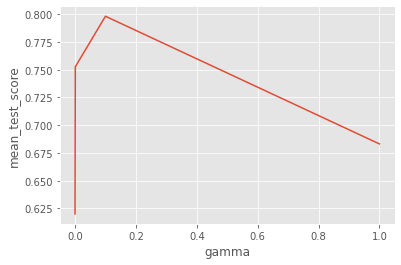

In [124]:
show_param_grid(gs_svc2, grid_svc2, 'gamma');

In [35]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(final_filter['Обращение полное'], final_filter['theme0'].astype('int'), test_size = 0.3, random_state=241)

In [126]:
[final_filter['Обращение полное']]

[0        здравствуйте, в приложении не сохраняется мой ...
 1        Добрый день, вы снова повысили лимит для перех...
 2        Обратная связь по обновленном приложению ,Рань...
 3        Здравствуйте, хочу активировать ещё одну карту...
 4        Сколько карт можно добавить  в приложение?,При...
                                ...                        
 16796    Здравствуйте, как можно поменять номер телефон...
 16797    а подскажите как привязать новую карту к тому ...
 16798    добрый день. по моему обращению была создана з...
 16799    Со своего телефона не получилось  актевировать...
 16800    Хотела узнать, обращение дошло и как долго буд...
 Name: Обращение полное, Length: 16445, dtype: object]

In [100]:
X_train 

3935     Здравствуйте! Оптимизируйте пожалуйста приложе...
9317     Почему не войти в приложение?,7825682033874788...
11866    как удалить другую карту изприложения,и добави...
2727     ?,а если заплачу больше чем запавлюсь, деньги ...
3279     Добрый день. Подскажите, моя карта зарегистрир...
                               ...                        
8803     АЗС 20 на ул. Владимировская в Новосибирске уж...
8829     Как начисляется кэшбэк по карте Почта банка?,У...
152      доброго вечера, у меня сменился телефон, к кот...
11184                 А нельзя сделать виртуальную карту? 
12940    Добрый день. Я заправлялась 12.06.2019 30 литр...
Name: Обращение полное, Length: 11511, dtype: object

In [101]:
Y_train

<4201x24003 sparse matrix of type '<class 'numpy.float64'>'
	with 80446 stored elements in Compressed Sparse Row format>

In [91]:
count_vect11 = CountVectorizer()
X_train = count_vect11.fit_transform(X_train)

In [94]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, pred)

NameError: name 'pred' is not defined

In [92]:
#4
clf_svc2 = SVC(kernel='linear', C = 1.0, random_state=241)
clf_svc2.fit(X_train, y_train)
X_test = count_vect11.transform(X_test)
pred1 = clf_svc2.predict(X_test)

In [95]:
accuracy_score(y_test, pred1)

0.8558978516416701

## Фильтрация нужных (популярных тем)  и запись в файл

In [26]:
final = final.drop('theme3',1 )
final = final.drop('index', 1)

In [27]:
final['theme2'].unique()

array([    nan, 101108., 101103., 101102.,   1052., 101105., 105125.,
       101107., 101106., 101104.,   1053., 101101.])

In [28]:
final['theme1'].unique()

array([1053, 'None', 1011, 1012, 1051, 1052, 1054, 1013, 101, 1040, 109,
       1014, 1073], dtype=object)

есть глупость с темами 105 и 101 - они повторяются, в результате чего 101 записыавется в theme1

In [29]:
final1 = final.loc[final['theme1'] != 109]
final1 = final.loc[final['theme1'] != 101]

In [30]:
#выбираем только популярные 
final_filter = final1.loc[(final1['theme0'] == 101) | (final1['theme0'] == 102) |(final1['theme0'] == 105)]
final_filter = final_filter.loc[final_filter['theme1'] != 109]
final_filter = final_filter.loc[final_filter['theme1'] != 101]

In [31]:
final_filter.head()

,Идентификатор обращения,Автор,Обращение последнее,Косинусная мера,Сообщение ЧАВО,Сообщение,theme0,theme1,theme2,Обращение полное
0,00000000-0001-0000-0018-000109471528,Guest,"здравствуйте, в приложении не сохраняется мой ...",0.650695,"Обновите, пожалуйста, приложение до последней ...","Пожалуйста, обновите приложение до последней в...",105,1053,NaN,"здравствуйте, в приложении не сохраняется мой ..."
1,00000000-0001-0000-0018-000109474719,Гость,"Добрый день, вы снова повысили лимит для перех...",0.779866,"Нет, таких АЗС нет.",Здравствуйте! Нет.,102,None,NaN,"Добрый день, вы снова повысили лимит для перех..."
2,00000000-0001-0000-0018-000109478254,Гость,Раньше сразу было указано сколько осталось лит...,0.959845,Благодарим Вас за пользование приложением сети...,Благодарим Вас за пользование приложением сети...,101,1011,101108.0,"Обратная связь по обновленном приложению ,Рань..."
3,00000000-0001-0000-0018-000109479360,7825682054563260,"Здравствуйте, хочу активировать ещё одну карту...",0.660144,В соответствии с условиями Программы лояльност...,Спасибо за ожидание. Нет. Согласно правилам п...,101,1012,NaN,"Здравствуйте, хочу активировать ещё одну карту..."
4,00000000-0001-0000-0018-000109485010,Гость,Не могу объединить карту и аннулировать старую,0.727443,В соответствии с условиями Программы лояльност...,"\nСогласно правилам программы лояльности, к од...",101,1012,NaN,"Сколько карт можно добавить в приложение?,При..."


In [32]:
final_filter = final_filter[['Косинусная мера','Сообщение ЧАВО', 'Сообщение', 'theme0', 'theme1', 'theme2','Обращение полное', 'Обращение последнее']]

In [33]:
dict_to_json = {}
dict_to_json_filter = {}

In [34]:
for t1 in final1['theme0'].unique():
    for t2 in final1['theme1'].unique():
        try:
            #print(final.loc[final['theme1'] == t2])
            try:
                for t3 in final1['theme2'].unique():
                    dict_tmp = {}
                    dict_tmp[t3] = final1.loc[final1['theme2'] == t3]
                    dict_to_json[t1][t2] = dict_tmp
                    s=0
            except:
                dict_tmp = {}
                dict_tmp[t2] = final1.loc[final1['theme1'] == t2]
                dict_to_json[t1] = dict_tmp
        except:
            dict_to_json[t1] = final1.loc[final1['theme0'] == t1]

In [35]:
for t1 in final_filter['theme0'].unique():
    for t2 in final_filter['theme1'].unique():
        try:
            #print(final_filter.loc[final_filter['theme1'] == t2])
            try:
                for t3 in final_filter['theme2'].unique():
                    dict_tmp = {}
                    dict_tmp[str(t3)] =  final_filter.loc[final_filter['theme2']==t3].to_json(orient='records')
                    #dict_tmp = {dict_tmp[str(t3)]:[{'Сообщение':final_filter.loc[final_filter['theme2'] == t3]['Сообщение']}]}
                    print(dict_tmp)
                    #dict_tmp[str(t3)] = final_filter.loc[final_filter['theme2'] == t3]
                    dict_to_json_filter[str(t1)][str(t2)] = dict_tmp
                    s=0
            except:
                dict_tmp = {}
                dict_tmp[str(t2)] =  final_filter.loc[final_filter['theme1']==t2].to_json(orient='records')
                    
                #dict_tmp[str(t2)] = final_filter.loc[final_filter['theme1'] == t2]
                dict_to_json_filter[str(t1)] = dict_tmp
        except:            
            dict_to_json_filter[str(t1)] = final_filter.loc[final_filter['theme0'] == t1].to_json(orient='records')        
            #dict_to_json_filter[str(t1)] = final_filter.loc[final_filter['theme0'] == t1]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
dict_to_json

{105: {1053:                     Идентификатор обращения             Автор  \
  0      00000000-0001-0000-0018-000109471528             Guest   
  9919   00000000-0001-0000-0018-000112201926  7825682056571915   
  9924   00000000-0001-0000-0018-000112203235             Guest   
  10050  00000000-0001-0000-0018-000112237543             Guest   
  10120  00000000-0001-0000-0018-000112254355             Guest   
  ...                                     ...               ...   
  16599  935aba33-175d-44eb-9cea-454a50ac335b            Натали   
  16618  9c906409-172f-4fc4-893d-8772d27650ef          Анатолий   
  16631  a0aeef6a-3b55-4b88-a127-c9dd8e870304              Илья   
  16666  b391ccf6-5ab0-47a0-ba18-2a49561b4644           Валерий   
  16798  fe66972b-8b82-41d5-a680-369a248509ea           Aleksey   
  
                                       Обращение последнее  Косинусная мера  \
  0      здравствуйте, в приложении не сохраняется мой ...         0.650695   
  9919                  

In [39]:
with open("json_for_classif", "w", encoding="utf-8", ) as file:
    json.dump(dict_to_json_filter, file, indent = 4)

In [ ]:
response = "Список актуальных акций Вы можете посмотреть, нажав значок «Акции» внизу экрана."
ReturnLabel(df_chavo, theme_label, response)

In [ ]:
d = pd.DataFrame(CousinDist(df_chavo, data_csv))

In [ ]:
d = d.loc[d['Косинусная мера'] > 0.65]

In [37]:
#добавляем метки согласно ответу из ЧАВО (метки будут у сообщений из переписки)
for i in range(0,2):
    d['theme'+ str(i)]='None'
    
for index, row in d.iterrows():
    #print(index)
    response = row['Сообщение ЧАВО']    
    #print(response)    
    res_lab = pd.DataFrame(ReturnLabel(df_chavo, theme_label, str(response)))
    for i in range(0,res_lab.shape[0]):
        #print(i, res_lab.iloc[i]['label'])
        d.at[index, 'theme'+ str(i)] = res_lab.iloc[i]['label']
        #print(row['theme'+ str(i)])

In [ ]:
d_chavo_shot.to_csv('result_with_labels', sep=';')

In [39]:
d = pd.DataFrame(d, columns = ['Косинусная мера','Идентификатор обращения','Сообщение ЧАВО', 'Сообщение','theme0', 'theme1', 'theme2'])

In [502]:
d.to_csv('result_with_labels_full', sep=';')

In [41]:
d_chavo_labels  = pd.DataFrame(d[['theme0', 'theme1', 'theme2']], columns = ['theme0', 'theme1', 'theme2'])

In [485]:
d_chavo_labels.groupby(['theme0']).agg('count').to_csv('group_by_1_full.csv', sep=';')

In [486]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count').to_csv('group_by_1_2_full.csv', sep=';')

In [423]:
d_chavo_labels.groupby(['theme0']).agg('count')

,theme1,theme2
theme0,,
None,4,4
SPACE.GO,9,9
STOPEXPRESS,3,3
АДРЕСА АЗС,198,198
ДРУГИЕ ПАРТНЕРЫ,9,9
МОБИЛЬНОЕ ПРИЛОЖЕНИЕ,740,740
ПРИЛОЖЕНИЕ АЗС GO,2436,2436
СЕТЬ ПАРТЕНРСКИХ АЗС «ОПТИ»,3,3
СОДЕРЖАНИЕ ЧЕКА/ДУБЛИКАТ ЧЕКА,4,4


In [424]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count')

theme2
theme0                        theme1                      
None                          None                       4
SPACE.GO                      None                       9
STOPEXPRESS                   None                       3
АДРЕСА АЗС                    None                     198
ДРУГИЕ ПАРТНЕРЫ               None                       9
МОБИЛЬНОЕ ПРИЛОЖЕНИЕ          КАРТА ПЛ В МП            340
                              ОПЛАТА ЧЕРЕЗ МП          263
                              ФУНКЦИОНАЛ МП            137
ПРИЛОЖЕНИЕ АЗС GO             МОБИЛЬНОЕ ПРИЛОЖЕНИЕ    1512
                              ОПЛАТА ЧЕРЕЗ АЗС.GO      259
                              ФУНКЦИОНАЛ АЗС.GO        665
СЕТЬ ПАРТЕНРСКИХ АЗС «ОПТИ»   None                       3
СОДЕРЖАНИЕ ЧЕКА/ДУБЛИКАТ ЧЕКА None                       1
                              КОПИЯ ЧЕКА                 3
СПОСОБЫ ОПЛАТЫ                None                       7

In [481]:
d_chavo_labels.groupby(['theme0']).agg('count')

,theme1,theme2
theme0,,
SPACE.GO,111,111
STOPEXPRESS,29,29
АДРЕСА АЗС,657,657
ДРУГИЕ ПАРТНЕРЫ,14,14
КОНТАКТЫ ЕЦПК,9,9
МОБИЛЬНОЕ ПРИЛОЖЕНИЕ,9495,9495
ПРИЛОЖЕНИЕ АЗС GO,13361,13361
РАЗВИТИЕ СЕТИ,9,9
СЕТЬ ПАРТЕНРСКИХ АЗС «ОПТИ»,37,37


In [482]:
d_chavo_labels.groupby(['theme0', 'theme1']).agg('count')

theme2
theme0                        theme1                               
SPACE.GO                      None                              109
                              ЗАПРАВИЛСЯ НЕ ТЕМ                   2
STOPEXPRESS                   None                               29
АДРЕСА АЗС                    None                              657
ДРУГИЕ ПАРТНЕРЫ               None                               12
                              ДРУГИЕ ПАРТНЕРЫ                     2
КОНТАКТЫ ЕЦПК                 None                                9
МОБИЛЬНОЕ ПРИЛОЖЕНИЕ          КАРТА ПЛ В МП                    6197
                              ОПЛАТА ЧЕРЕЗ МП                  1592
                              СЕРВИСЫ ПАРТНЕРОВ МП               14
                              ФУНКЦИОНАЛ МП                    1692
ПРИЛОЖЕНИЕ АЗС GO             КАРТА ПЛ В АЗС.GO                 409
                              МОБИЛЬНОЕ ПРИЛОЖЕНИЕ             1683
                              ОПЛАТА ЧЕРЕЗ АЗС.GO              1918
                              СОВМЕСТНАЯ АКЦИЯ МИР - АЗС.GO    5613
                              ФУНКЦИОНАЛ АЗС.GO                3738
РАЗВИТИЕ СЕТИ                 None                                9
СЕТЬ ПАРТЕНРСКИХ АЗС «ОПТИ»   None                               37
СОДЕРЖАНИЕ ЧЕКА/ДУБЛИКАТ ЧЕКА None                               36
                              КОПИЯ ЧЕКА                        154
СПОСОБЫ ОПЛАТЫ                None                               52
                              КАРТА ПЛ В АЗС.GO                   1
                              СОВМЕСТНАЯ АКЦИЯ МИР - АЗС.GO       1
                              ФУНКЦИОНАЛ АЗС.GO                   2

In [487]:
d_chavo_labels.groupby(['theme0', 'theme1', 'theme2']).agg('count')

Empty DataFrame
Columns: []
Index: [(SPACE.GO, None, None), (SPACE.GO, ЗАПРАВИЛСЯ НЕ ТЕМ, None), (STOPEXPRESS, None, None), (АДРЕСА АЗС, None, None), (ДРУГИЕ ПАРТНЕРЫ, None, None), (ДРУГИЕ ПАРТНЕРЫ, ДРУГИЕ ПАРТНЕРЫ, None), (КОНТАКТЫ ЕЦПК, None, None), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, КАРТА ПЛ В МП, None), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ОПЛАТА ЧЕРЕЗ МП, None), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, СЕРВИСЫ ПАРТНЕРОВ МП, None), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, АКЦИИ), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ВХОД (АТВОРИЗАЦИЯ)), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ЛИТРЫ), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ОЦЕНКА АЗС), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, РАБОТА МОБИЛЬНОГО ПРИЛОЖЕНИЯ), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ТАРИФЫ), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ФУНКЦИИ), (МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ФУНКЦИОНАЛ МП, ЦЕНА), (ПРИЛОЖЕНИЕ АЗС GO, КАРТА ПЛ В АЗС.GO, None), (ПРИЛОЖЕНИЕ АЗС GO, МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, КАРТА ПЛ В АЗС.GO), (ПРИЛОЖЕНИЕ АЗС GO, МОБИЛЬНОЕ ПРИЛОЖЕНИЕ, ОПЛАТА ЧЕРЕЗ АЗС.GO), (ПРИЛОЖЕНИЕ АЗС GO, ОПЛАТА ЧЕРЕЗ АЗС.GO, None), (ПРИЛОЖЕНИЕ АЗС GO, СОВМЕСТНАЯ АКЦИЯ МИР - АЗС.GO, None), (ПРИЛОЖЕНИЕ АЗС GO, ФУНКЦИОНАЛ АЗС.GO, CarTaxi), (ПРИЛОЖЕНИЕ АЗС GO, ФУНКЦИОНАЛ АЗС.GO, None), (РАЗВИТИЕ СЕТИ, None, None), (СЕТЬ ПАРТЕНРСКИХ АЗС «ОПТИ», None, None), (СОДЕРЖАНИЕ ЧЕКА/ДУБЛИКАТ ЧЕКА, None, None), (СОДЕРЖАНИЕ ЧЕКА/ДУБЛИКАТ ЧЕКА, КОПИЯ ЧЕКА, None), (СПОСОБЫ ОПЛАТЫ, None, None), (СПОСОБЫ ОПЛАТЫ, КАРТА ПЛ В АЗС.GO, None), (СПОСОБЫ ОПЛАТЫ, СОВМЕСТНАЯ АКЦИЯ МИР - АЗС.GO, None), (СПОСОБЫ ОПЛАТЫ, ФУНКЦИОНАЛ АЗС.GO, None)]

In [497]:
theme_label.drop_duplicates(subset='theme', keep="last").sort_values(by='theme').reset_index().to_csv('labels.csv', sep=';')

In [499]:
theme_label = theme_label.drop_duplicates(subset='theme', keep="last").sort_values(by='theme').reset_index()

In [501]:
theme_label[['label', 'theme']].to_csv('labels.csv', sep=';')

In [89]:
data_csv_test = pd.DataFrame(data_csv_test.dropna().groupby('Идентификатор обращения')['Сообщения'].apply(list),columns=['Идентификатор обращения', 'Сообщения'])